# Actividad - Estadística básica

* **Nombre: Rommel Pacheco Hernández**
* **Matrícula:A01709035**

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [ ]:
# Carga las librerías necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px


In [ ]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
      

Saving bestsellers with categories.csv to bestsellers with categories.csv
User uploaded file "bestsellers with categories.csv" with length 51159 bytes


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

## Análisis estadístico
1. Carga la tabla de datos y haz un análisis estadístico de las variables.
* Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.
* Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.
* Basándote en la media, mediana y desviación estándar de cada variable, ¿qué conclusiones puedes entregar de los datos?
* Calcula la correlación de las variables que consideres relevantes.

In [ ]:
# Escribe el código necesario para realizar el análisis estadístico descrito 
# anteriorment.
df = pd.read_csv('bestsellers with categories.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
df.max()

Name           You Are a Badass: How to Stop Doubting Your Gr...
Author                                              Zhi Gang Sha
User Rating                                                  4.9
Reviews                                                    87841
Price                                                        105
Year                                                        2019
Genre                                                Non Fiction
dtype: object

In [ ]:
df.min()

Name           10-Day Green Smoothie Cleanse
Author                      Abraham Verghese
User Rating                              3.3
Reviews                                   37
Price                                      0
Year                                    2009
Genre                                Fiction
dtype: object

In [ ]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [ ]:
df.median()

<ipython-input-33-6d467abf240d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


User Rating       4.7
Reviews        8580.0
Price            11.0
Year           2014.0
dtype: float64

Conclusiones: Tenemos 550 registros sin información faltante donde analizamos en 4 periodos de tiempo separados por 3 años. El producto que se esta vendiendo varía desde un minimo de 13 hasta 105 de una forma regular ya que según la distribución de los datos van aumentando su costo en casi 11 de acuerdo a la media por lo que no estan tan dispersos los precios. Algo a destacar es que mientras avanzan los quantiles aumenta de forma considerable el número de views (del primero al segundo hay un diferencia de 4500 aprox. views, mientras que del segundo al tercero aumenta un poco más del doble 8673), de acuerdo a la mediana el punto medio de los precios son baratos con un precio de 11, también comparando la media y la mediana (del precio) vemos que no hay tantos datos atipicos, en el año vemos que desde finales del quantil 1 hasta principios del cuatro existen muchos libros de la decada pasada. Algo que veo en general es que mientras más aumenta el año en la desviación va aumentando todo, tal vez no puedo decirlo con todo seguridad  de que mientras más avanza el tiempo es más caro comprar un libro, más gente lo ve y a más gente le gusta. Esto lo podríamos responder más adelante porque necesitamos un analisis más profundo con otras herramientas.

In [ ]:
df.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


¿Cuáles son las variables relevantes e irrelevantes para el análisis?

** Depende que queremos buscar ya que en este ejercicio no nos concentramos en un pregunta en particular asi que para responder esto lo tendría en a perspectiva en que tantas información podríamos sacar de todo el conjunto de datos, por lo tanto yo creo que los datos que menos información nos pueden dar serían Name, Author y Genre ya que aunque podemos buscar que tanto se repite por ejemplo el genero y el autor para hacer futuras obras exitosas, no podemos ver algo más que eso y el nombre es algo que se repite una vez algo que en este trabajo no investigaremos tal vez serviría si hicieramos un análisis del lenguaje para saber que temas o palabras en el titulo tienen en común. **

## Análisis gráfico

Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.

Responde las siguientes preguntas:
* ¿Hay alguna variable que no aporta información? Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?
Como ya dije en el apartado anterior la variable que no aporta información sería el nombre, pero aparte del name quitaría Author también por la poca información que nos podrían dar en este estudio. Además que son datos cualitativos y estorban mucho al hacer tablas.
* ¿Existen variables que tengan datos extraños?

* Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?
* ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

Haz un análisis estadístico de los datos antes de empezar con la segmentación. Debe contener al menos:
* 1 gráfico de caja (boxplot)
* 1 mapa de calor
* 1 gráfico de dispersión
   
Describe brevemente las conclusiones que se pueden obtener con las gráficas.

In [ ]:
#Quito datos que no quiero
df = df.drop(['Name','Author'], axis=1)
df

,User Rating,Reviews,Price,Year,Genre
0,4.7,17350,8,2016,Non Fiction
1,4.6,2052,22,2011,Fiction
2,4.7,18979,15,2018,Non Fiction
3,4.7,21424,6,2017,Fiction
4,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...
545,4.9,9413,8,2019,Fiction
546,4.7,14331,8,2016,Non Fiction
547,4.7,14331,8,2017,Non Fiction
548,4.7,14331,8,2018,Non Fiction


Text(0.5, 1.05, 'Gráfico de pares de las variables numéricas por género')

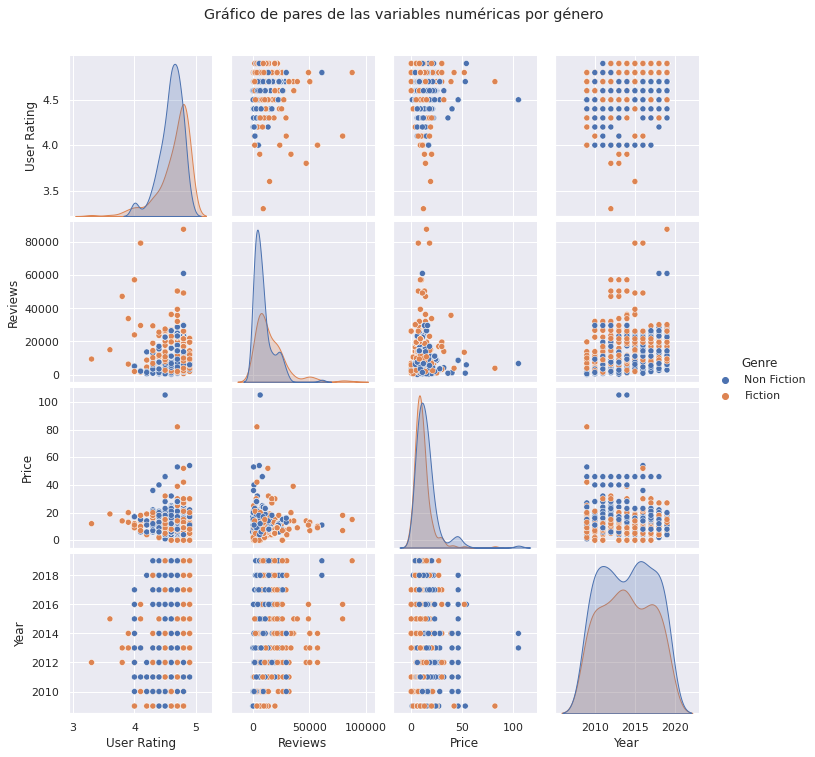

In [ ]:
#buscamos datos extraños
sns.pairplot(data=df, hue='Genre')
plt.suptitle('Gráfico de pares de las variables numéricas por género', y=1.05)

Si existen datos extraños ya que se alejan de la media ya sea para un aumento o para disminuir por ejemplo allgo extraño serían los precios nos hace preguntar ¿Por qué tan caro o gratis?, igual las demás variables nos hacen cuestionarnos como por ejemplo: ¿Por que tiene tantas views o nadie lo ve? , ¿Por que tiene mucho o poco rating?. 

Respondiendo a la pregunta 3 yo pienso qu esi estan en rangos similares, pero hay datos extraños que pueden afectar la investigación y provocan preguntas detontantes con relación a ¿Por qué estan ahí?

No podemos encontrar grupos que se parezcan porque ni siquiera podemos definir los grupos, los datos están demasiados juntos como para dividirlos, tal vez podriamos hacerlo si generamos más datos extraños en relación al aumento.

Text(0, 0.5, 'Reviews')

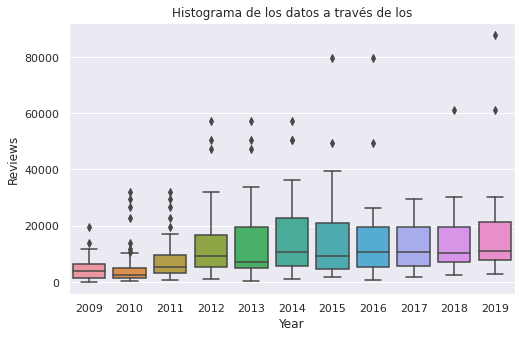

In [ ]:
# Box Plot 1
fig = plt.figure(figsize=(8,5))

# Gráfico boxplot. Invertimos los ejes.
sns.boxplot(data=df, x = 'Year', y = 'Reviews')

# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Histograma de los Reviews a través de los años')
plt.ylabel('Reviews')

Text(0, 0.5, 'Precios')

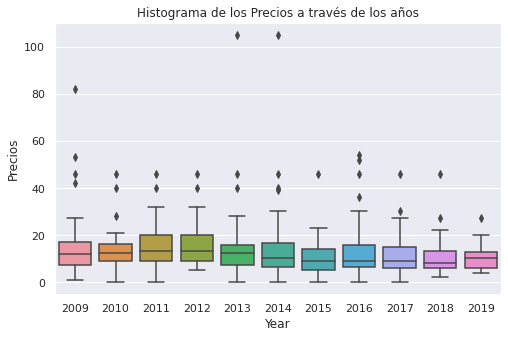

In [ ]:
# Box Plot 2
fig = plt.figure(figsize=(8,5))

# Gráfico boxplot. Invertimos los ejes.
sns.boxplot(data=df, x = 'Year', y = 'Price')

# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Histograma de los Precios a través de los años')
plt.ylabel('Precios')

Text(0, 0.5, 'User Rating')

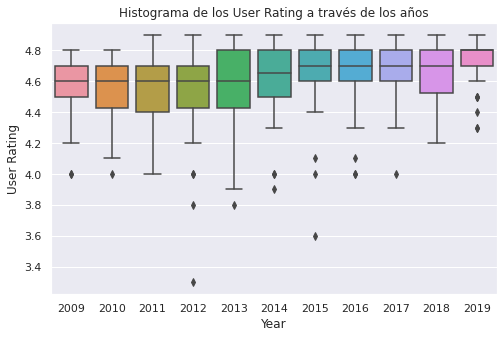

In [ ]:
# Box Plot 3
fig = plt.figure(figsize=(8,5))

# Gráfico boxplot. Invertimos los ejes.
sns.boxplot(data=df, x = 'Year', y = 'User Rating')

# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Histograma de los User Rating a través de los años')
plt.ylabel('User Rating')

<Axes: >

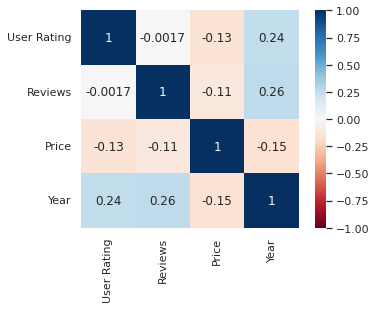

In [ ]:
#Heat map
dfcorr = df.corr()
sns.heatmap(data=dfcorr, vmin=-1, vmax=1, cmap = 'RdBu', annot=True, square = True)

**Podemos observar que hay una correlación debíl lo que significa que afectaría muy poco en el aumento de las variables y que existe una correlación negativa debil provocando que no hay un incremento inverso tan aletrado. Asií podemos ver que lo que dije al principio de este análisis no era cierto con respecto al precio.**

## Clústering

Una vez que hayas realizado un análisis preliminar, haz una segmentación utilizando el método de K-Means. Justifica el número de clusters que elegiste.
* Determina un valor de $k$ = 6
* Calcula los centros de los grupos resultantes del algoritmo k-means = penultima tabla y grafico 3d

Basado en los centros responde las siguientes preguntas
- ¿Crees que estos centros puedan ser representativos de los datos? Si  ¿Por qué? porque se escogió la k exacta y se elimino una variable que no era necesaria
- ¿Cómo obtuviste el valor de $k$ a usar? Hice pruebas hasta que en el método de codo y el método de Silhouette Score se manifestará una pendiente pronunciada mientras aumentaba la x
- ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo? Según yo daría igual porque más bien el dato se refiere a labusqueda de patrones más si aumentaramos el valor de los datos o disminuyeramos el valor de todos los datos solamente encontraríamos los mismos patrones, pero con diferente contexto y esto es importante porque depende el contesto el valor de los patrones. Por ejemplo yo quise poner de variable el año, pero no era necesario en realidad solo searaba más los grupos.
- ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes? Es que los outliers según a lo que entendí son datos extraños por lo que el método los considera y tal vez puede considerar más a estos que a otros datos que si son más persistentes en el conjunto de datos por lo que de alguna manera haría que los centro fueran más irreales de lo que ya pudieran ser.
- ¿Qué puedes decir de los datos basándose en los centros? Siento que el grupo 2 que es el naranja es el más real porque no tiene datos extraños como los demás grupos. 

In [ ]:
# Implementa el algoritmo de kmeans y justifica la elección del número de 
# clusters. Usa las variables numéricas.
numeric_cols = ['Price', 'Reviews',	'User Rating']
X = df.loc[:, numeric_cols]

# Hacemos el escalamiento.
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# El escalador nos genera una matriz de numpy. Vamos a convertirlo en DF
X_norm = pd.DataFrame(X_norm, columns=numeric_cols)
X_norm.head()

,Price,Reviews,User Rating
0,-0.470810,0.460453,0.359990
1,0.821609,-0.844786,-0.080978
2,0.175400,0.599440,0.359990
3,-0.655441,0.808050,0.359990
4,-0.101547,-0.365880,0.800958


In [ ]:
kmax   = 6
#Use 6 grupos porque son los suficientes para  determinar donde se hace una
# pendiente más grandes, si usaba más ya no eran necesarios 
grupos = range(2, kmax)
wcss   = []
sil_score = []

# Ciclo para calcular K-Means para diferentes k
for k in grupos:
    # Clustering
    model = KMeans(n_clusters=k, random_state = 47)

    # Obtener las etiquetas
    clusters = model.fit_predict(X_norm)

    # Guardar WCSS
    wcss.append(model.inertia_)

    # Guardar Silhouette Score
    sil_score.append(silhouette_score(X_norm, clusters))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Text(0.5, 1.0, 'Silhouette Score')

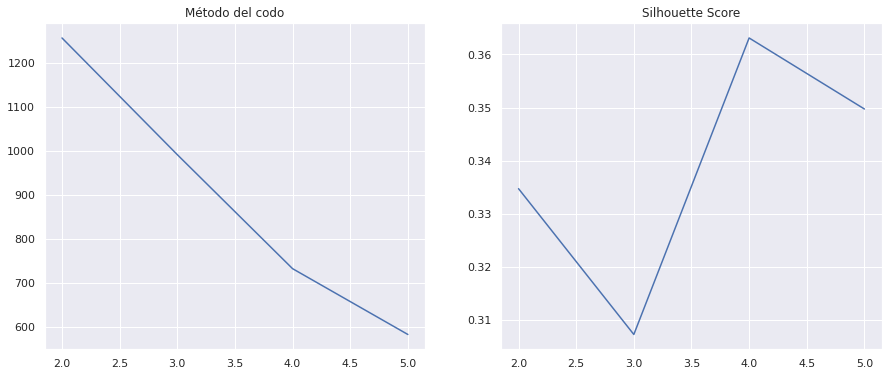

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Primera figura es el codo
axs[0].plot(grupos, wcss)
axs[0].set_title('Método del codo')

# La segunda es el Silhouette Score
axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')

Analiza las características de cada grupo. ¿Qué nombre le pondrías a cada segmento?

** Escribe la respuesta **

In [ ]:
# Haz un análisis por grupo para determinar las características que los hace 
# únicos. Ten en cuenta todas las variables numéricas.
model = KMeans(n_clusters=4, random_state=47)
clusters = model.fit_predict(X_norm)


df['Grupo'] = clusters.astype('str')
df.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,User Rating,Reviews,Price,Year,Genre,Grupo
0,4.7,17350,8,2016,Non Fiction,0
1,4.6,2052,22,2011,Fiction,2
2,4.7,18979,15,2018,Non Fiction,0
3,4.7,21424,6,2017,Fiction,0
4,4.8,7665,12,2019,Non Fiction,2


Text(0.5, 1.05, '4 grupos de clientes')

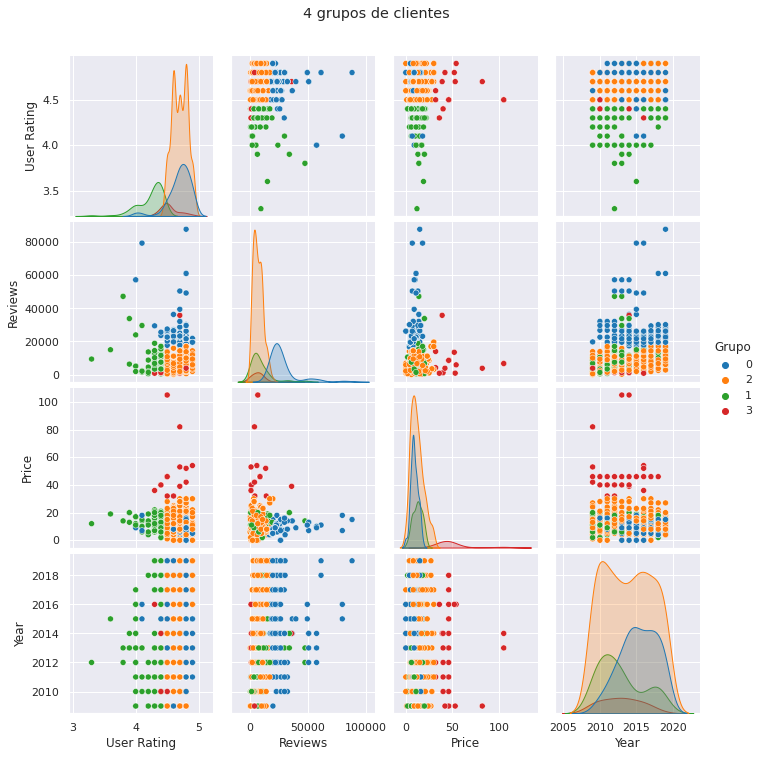

In [ ]:

sns.pairplot(data=df, hue='Grupo', palette='tab10')
plt.suptitle('4 grupos de clientes', y=1.05)

In [ ]:
# Grafica los grupos con un pairplot y con un scatterplot en 3D 
# (si es necesario). Analiza las características de cada grupo.
# Creamos la figura donde graficaremos
fig = px.scatter_3d(df, x = 'Price', y = 'Reviews', 
                    z = 'User Rating', 
                    title='4 grupos de clientes',
                    color='Grupo',  
                    color_discrete_sequence=px.colors.qualitative.D3)

# mostramos la imagen
fig.show()

Analiza las características de cada grupo. ¿Qué nombre le pondrías a cada segmento?

** Grupo0/Azul =Grupo de los vistos, con buena calificación y bajo precio
   
   Grupo1/verde = Grupo de las peores calificaciones, con muchas views, pero a poco precio yo diría que es un grupo calidad-precio

   Grupo2/Naranja = El Grupo más compacto y de lo mejor de libros segun su rating y precio, pero tal vez es beneficiado por su bajo Review.

   Grupo3/rojo = Este grupo siento que es algo engañoso porque cuesta mucho, pero tiene pocos reviews y buen rating a lo que quiero llegar es que tal vez puedes comprar libros más baratos del grupo naranja y de buena calidad que gastar más por un libro de igual calidad de forma popular.
   
**

In [ ]:
#Centros más cercanos
df.groupby('Grupo').mean()

,User Rating,Reviews,Price,Year
Grupo,,,,
0,4.191803,8696.754098,12.786885,2012.655738
1,4.412500,58490.375000,11.687500,2014.687500
2,4.536000,7342.360000,50.400000,2012.920000
3,4.638068,5785.818182,13.125000,2010.971591
4,4.725664,23424.566372,9.265487,2015.442478
5,4.717610,7918.981132,10.194969,2016.943396


In [ ]:
df.groupby('Grupo').std()

,User Rating,Reviews,Price,Year
Grupo,,,,
0,0.208403,7702.330954,4.665886,2.676349
1,0.411299,12743.848100,2.891799,2.358495
2,0.146856,7093.968417,18.779421,2.722132
3,0.124095,4604.885799,6.884870,1.561790
4,0.131461,4506.518467,4.777211,2.333521
5,0.140314,3883.125892,6.145368,1.588110
